<a href="https://colab.research.google.com/github/DhanushPrakash/Dhanushprakash_20191ISE0044_LINEAR-REGRESSION_NASSCOM_OPTIONB_5ISE01/blob/main/Dhanushprakash_20191ISE0044_LINEAR_REGRESSION_NASSCOM_OPTIONB_5ISE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : DHANUSH.P

SECTION :5ISE01

ROLL NUMBER : 20191ISE0044

CO-ORDINATOR : ANITHA PREMAKUMARI

OPTION : B (NASSCOM)

TOPIC : LINEAR REGRESSION

1.Face completion with a multi-output estimators(LINEAR_REGRESSION)

2.Prediction Latency (LINEAR_REGRESSION)

3.Plotting Cross-Validated Predictions (LINEAR_REGRESSION)



==============================================

Face completion with a multi-output estimators(LINEAR_REGRESSION)

NAME : DHANUSH.P

ROLL NUMBER: 20191ISE0044

SECTION : 5ISE01

NASSCOM (OPTION B)

==============================================

Automatically created module for IPython interactive environment
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


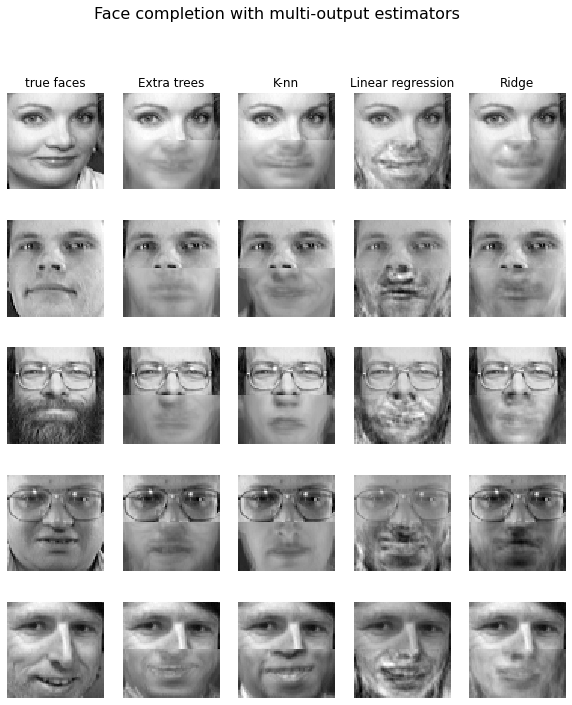

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()


==================

Prediction Latency

 NAME : DHANUSH.P

SECTION : 5ISE01

ROLL NUMBER: 20191ISE0044

OPTION B NASSCOM

==================

Benchmarking SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.25,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
Benchmarking RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Benchmarking SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1

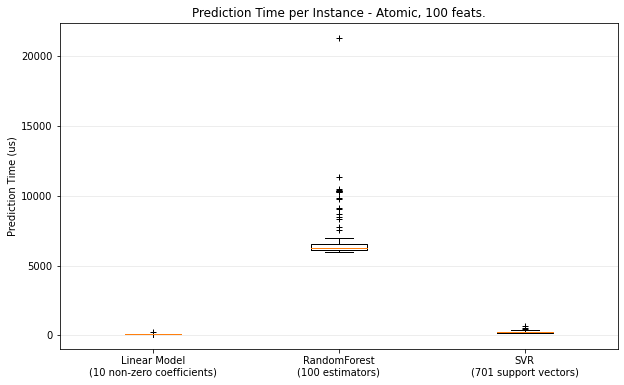

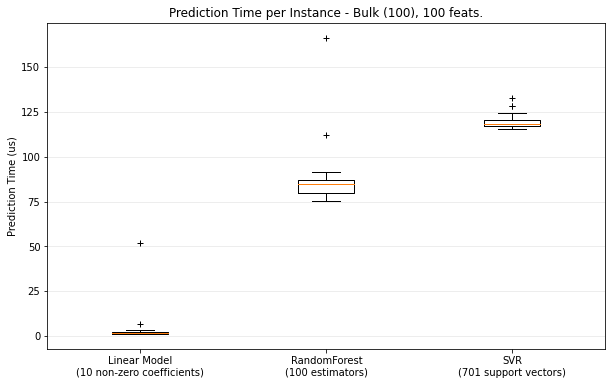

benchmarking with 100 features
benchmarking with 250 features
benchmarking with 500 features


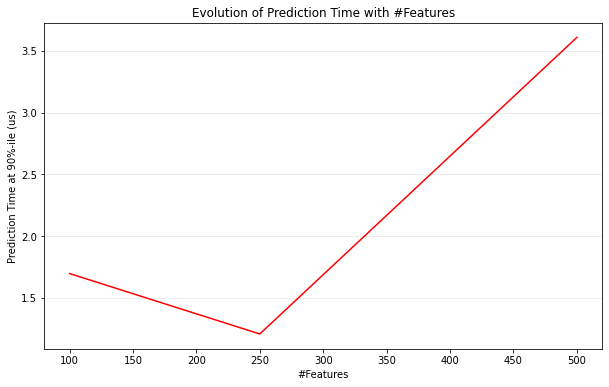

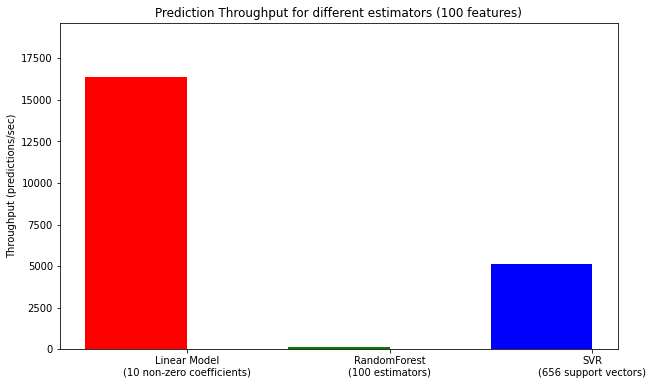

example run in 13.96s


In [ ]:
from collections import defaultdict

import time
import gc
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.utils import shuffle


def _not_in_sphinx():
    # Hack to detect whether we are running by the sphinx builder
    return '__file__' in globals()


def atomic_benchmark_estimator(estimator, X_test, verbose=False):
    """Measure runtime prediction of each instance."""
    n_instances = X_test.shape[0]
    runtimes = np.zeros(n_instances, dtype=float)
    for i in range(n_instances):
        instance = X_test[[i], :]
        start = time.time()
        estimator.predict(instance)
        runtimes[i] = time.time() - start
    if verbose:
        print("atomic_benchmark runtimes:", min(runtimes), np.percentile(
            runtimes, 50), max(runtimes))
    return runtimes


def bulk_benchmark_estimator(estimator, X_test, n_bulk_repeats, verbose):
    """Measure runtime prediction of the whole input."""
    n_instances = X_test.shape[0]
    runtimes = np.zeros(n_bulk_repeats, dtype=float)
    for i in range(n_bulk_repeats):
        start = time.time()
        estimator.predict(X_test)
        runtimes[i] = time.time() - start
    runtimes = np.array(list(map(lambda x: x / float(n_instances), runtimes)))
    if verbose:
        print("bulk_benchmark runtimes:", min(runtimes), np.percentile(
            runtimes, 50), max(runtimes))
    return runtimes


def benchmark_estimator(estimator, X_test, n_bulk_repeats=30, verbose=False):
    """
    Measure runtimes of prediction in both atomic and bulk mode.

    Parameters
    ----------
    estimator : already trained estimator supporting `predict()`
    X_test : test input
    n_bulk_repeats : how many times to repeat when evaluating bulk mode

    Returns
    -------
    atomic_runtimes, bulk_runtimes : a pair of `np.array` which contain the
    runtimes in seconds.

    """
    atomic_runtimes = atomic_benchmark_estimator(estimator, X_test, verbose)
    bulk_runtimes = bulk_benchmark_estimator(estimator, X_test, n_bulk_repeats,
                                             verbose)
    return atomic_runtimes, bulk_runtimes


def generate_dataset(n_train, n_test, n_features, noise=0.1, verbose=False):
    """Generate a regression dataset with the given parameters."""
    if verbose:
        print("generating dataset...")

    X, y, coef = make_regression(n_samples=n_train + n_test,
                                 n_features=n_features, noise=noise, coef=True)

    random_seed = 13
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=n_train, test_size=n_test, random_state=random_seed)
    X_train, y_train = shuffle(X_train, y_train, random_state=random_seed)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
    y_test = y_scaler.transform(y_test[:, None])[:, 0]

    gc.collect()
    if verbose:
        print("ok")
    return X_train, y_train, X_test, y_test


def boxplot_runtimes(runtimes, pred_type, configuration):
    """
    Plot a new `Figure` with boxplots of prediction runtimes.

    Parameters
    ----------
    runtimes : list of `np.array` of latencies in micro-seconds
    cls_names : list of estimator class names that generated the runtimes
    pred_type : 'bulk' or 'atomic'

    """

    fig, ax1 = plt.subplots(figsize=(10, 6))
    bp = plt.boxplot(runtimes, )

    cls_infos = ['%s\n(%d %s)' % (estimator_conf['name'],
                                  estimator_conf['complexity_computer'](
                                      estimator_conf['instance']),
                                  estimator_conf['complexity_label']) for
                 estimator_conf in configuration['estimators']]
    plt.setp(ax1, xticklabels=cls_infos)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set_axisbelow(True)
    ax1.set_title('Prediction Time per Instance - %s, %d feats.' % (
        pred_type.capitalize(),
        configuration['n_features']))
    ax1.set_ylabel('Prediction Time (us)')

    plt.show()


def benchmark(configuration):
    """Run the whole benchmark."""
    X_train, y_train, X_test, y_test = generate_dataset(
        configuration['n_train'], configuration['n_test'],
        configuration['n_features'])

    stats = {}
    for estimator_conf in configuration['estimators']:
        print("Benchmarking", estimator_conf['instance'])
        estimator_conf['instance'].fit(X_train, y_train)
        gc.collect()
        a, b = benchmark_estimator(estimator_conf['instance'], X_test)
        stats[estimator_conf['name']] = {'atomic': a, 'bulk': b}

    cls_names = [estimator_conf['name'] for estimator_conf in configuration[
        'estimators']]
    runtimes = [1e6 * stats[clf_name]['atomic'] for clf_name in cls_names]
    boxplot_runtimes(runtimes, 'atomic', configuration)
    runtimes = [1e6 * stats[clf_name]['bulk'] for clf_name in cls_names]
    boxplot_runtimes(runtimes, 'bulk (%d)' % configuration['n_test'],
                     configuration)


def n_feature_influence(estimators, n_train, n_test, n_features, percentile):
    """
    Estimate influence of the number of features on prediction time.

    Parameters
    ----------

    estimators : dict of (name (str), estimator) to benchmark
    n_train : nber of training instances (int)
    n_test : nber of testing instances (int)
    n_features : list of feature-space dimensionality to test (int)
    percentile : percentile at which to measure the speed (int [0-100])

    Returns:
    --------

    percentiles : dict(estimator_name,
                       dict(n_features, percentile_perf_in_us))

    """
    percentiles = defaultdict(defaultdict)
    for n in n_features:
        print("benchmarking with %d features" % n)
        X_train, y_train, X_test, y_test = generate_dataset(n_train, n_test, n)
        for cls_name, estimator in estimators.items():
            estimator.fit(X_train, y_train)
            gc.collect()
            runtimes = bulk_benchmark_estimator(estimator, X_test, 30, False)
            percentiles[cls_name][n] = 1e6 * np.percentile(runtimes,
                                                           percentile)
    return percentiles


def plot_n_features_influence(percentiles, percentile):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    colors = ['r', 'g', 'b']
    for i, cls_name in enumerate(percentiles.keys()):
        x = np.array(sorted([n for n in percentiles[cls_name].keys()]))
        y = np.array([percentiles[cls_name][n] for n in x])
        plt.plot(x, y, color=colors[i], )
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)
    ax1.set_axisbelow(True)
    ax1.set_title('Evolution of Prediction Time with #Features')
    ax1.set_xlabel('#Features')
    ax1.set_ylabel('Prediction Time at %d%%-ile (us)' % percentile)
    plt.show()


def benchmark_throughputs(configuration, duration_secs=0.1):
    """benchmark throughput for different estimators."""
    X_train, y_train, X_test, y_test = generate_dataset(
        configuration['n_train'], configuration['n_test'],
        configuration['n_features'])
    throughputs = dict()
    for estimator_config in configuration['estimators']:
        estimator_config['instance'].fit(X_train, y_train)
        start_time = time.time()
        n_predictions = 0
        while (time.time() - start_time) < duration_secs:
            estimator_config['instance'].predict(X_test[[0]])
            n_predictions += 1
        throughputs[estimator_config['name']] = n_predictions / duration_secs
    return throughputs


def plot_benchmark_throughput(throughputs, configuration):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['r', 'g', 'b']
    cls_infos = ['%s\n(%d %s)' % (estimator_conf['name'],
                                  estimator_conf['complexity_computer'](
                                      estimator_conf['instance']),
                                  estimator_conf['complexity_label']) for
                 estimator_conf in configuration['estimators']]
    cls_values = [throughputs[estimator_conf['name']] for estimator_conf in
                  configuration['estimators']]
    plt.bar(range(len(throughputs)), cls_values, width=0.5, color=colors)
    ax.set_xticks(np.linspace(0.25, len(throughputs) - 0.75, len(throughputs)))
    ax.set_xticklabels(cls_infos, fontsize=10)
    ymax = max(cls_values) * 1.2
    ax.set_ylim((0, ymax))
    ax.set_ylabel('Throughput (predictions/sec)')
    ax.set_title('Prediction Throughput for different estimators (%d '
                 'features)' % configuration['n_features'])
    plt.show()


# #############################################################################
# Main code

start_time = time.time()

# #############################################################################
# Benchmark bulk/atomic prediction speed for various regressors
configuration = {
    'n_train': int(1e3),
    'n_test': int(1e2),
    'n_features': int(1e2),
    'estimators': [
        {'name': 'Linear Model',
         'instance': SGDRegressor(penalty='elasticnet', alpha=0.01,
                                  l1_ratio=0.25, tol=1e-4),
         'complexity_label': 'non-zero coefficients',
         'complexity_computer': lambda clf: np.count_nonzero(clf.coef_)},
        {'name': 'RandomForest',
         'instance': RandomForestRegressor(),
         'complexity_label': 'estimators',
         'complexity_computer': lambda clf: clf.n_estimators},
        {'name': 'SVR',
         'instance': SVR(kernel='rbf'),
         'complexity_label': 'support vectors',
         'complexity_computer': lambda clf: len(clf.support_vectors_)},
    ]
}
benchmark(configuration)

# benchmark n_features influence on prediction speed
percentile = 90
percentiles = n_feature_influence({'ridge': Ridge()},
                                  configuration['n_train'],
                                  configuration['n_test'],
                                  [100, 250, 500], percentile)
plot_n_features_influence(percentiles, percentile)

# benchmark throughput
throughputs = benchmark_throughputs(configuration)
plot_benchmark_throughput(throughputs, configuration)

stop_time = time.time()
print("example run in %.2fs" % (stop_time - start_time))

====================================

Plotting Cross-Validated Predictions

 
NAME : DHANUSH.P

ROLL NUMBER : 20191ISE0044

SECTION : 5ISE01

NASSCOM (OPTION B)

====================================

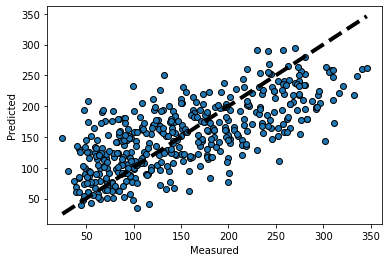

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
X, y = datasets.load_diabetes(return_X_y=True)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
